In [89]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

from cycler import cycler
import matplotlib.cm as cm

# Set Dark2 as the default color cycle
dark2 = cm.get_cmap('Dark2').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=dark2)

%matplotlib widget

/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_86667/1886163394.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  dark2 = cm.get_cmap('Dark2').colors


In [90]:
Bi_ion_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_merged.h5", "MC/E")
Bi_ion_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_15bar_merged.h5", "MC/E")
Bi_ion_10bar = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_10bar_merged.h5", "MC/E")
Bi_ion_5bar  = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_5bar_merged.h5", "MC/E")
Bi_ion_1bar  = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_1bar_merged.h5", "MC/E")
display(Bi_ion_15bar)
display(Bi_ion_25bar)

Bi_ion_25bar_events = len(Bi_ion_25bar.event_id.unique())
Bi_ion_15bar_events = len(Bi_ion_15bar.event_id.unique())
Bi_ion_10bar_events = len(Bi_ion_10bar.event_id.unique())
Bi_ion_5bar_events  = len(Bi_ion_5bar.event_id.unique())
Bi_ion_1bar_events  = len(Bi_ion_1bar.event_id.unique())

print(len(Bi_ion_25bar.event_id.unique()), len(Bi_ion_15bar.event_id.unique()), len(Bi_ion_10bar.event_id.unique()), len(Bi_ion_5bar.event_id.unique()), len(Bi_ion_1bar.event_id.unique()))


Tl_ion_25bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_merged.h5", "MC/E")
Tl_ion_15bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_15bar_merged.h5", "MC/E")
Tl_ion_10bar = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_10bar_merged.h5", "MC/E")
Tl_ion_5bar  = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_5bar_merged.h5", "MC/E")
Tl_ion_1bar  = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_1bar_merged.h5", "MC/E")

Tl_ion_25bar_events = len(Tl_ion_25bar.event_id.unique())
Tl_ion_15bar_events = len(Tl_ion_15bar.event_id.unique())
Tl_ion_10bar_events = len(Tl_ion_10bar.event_id.unique())
Tl_ion_5bar_events  = len(Tl_ion_5bar.event_id.unique())
Tl_ion_1bar_events  = len(Tl_ion_1bar.event_id.unique())

,event_id,CreatorProc,energy,mother_E,initial_x,initial_y,initial_z,final_x,final_y,final_z,contained
0,640000,compt,2.505360,1.896045,-62,1254,-778,134,1129,-805,True
1,640001,compt,2.447687,2.447687,-660,546,1289,-683,596,807,True
2,640002,phot,2.447687,2.447687,-626,-358,1254,-634,-272,1128,True
3,640003,conv,2.472469,2.472469,-17,364,-1275,-752,-85,-640,True
4,640004,compt,2.447687,2.447687,-858,-937,1071,-780,-879,1075,True
...,...,...,...,...,...,...,...,...,...,...,...
204,640000204,compt,2.447687,2.447687,-1044,-76,-1266,-243,177,68,True
205,640000205,compt,2.447693,1.838377,-117,1250,-238,-238,1111,-451,True
206,640000206,compt,2.447687,2.447687,-181,571,1279,-251,243,182,True
207,640000207,compt,2.447687,2.447687,-489,159,1270,-999,402,-307,True


,event_id,CreatorProc,energy,mother_E,initial_x,initial_y,initial_z,final_x,final_y,final_z,contained
0,360000,compt,2.438282,2.447687,204,-133,1062,341,372,938,True
1,360001,compt,2.447687,2.447687,-195,-176,1059,-116,-717,406,True
2,360002,compt,2.362164,2.447687,955,-511,-64,-3,-203,161,True
3,360003,compt,2.447687,2.447687,-364,963,-1074,-92,900,-749,True
4,360004,compt,2.447687,2.447687,-232,538,-1067,-745,-365,-533,True
...,...,...,...,...,...,...,...,...,...,...,...
161,360000161,compt,2.482459,1.661272,883,605,-337,47,719,-250,True
162,360000162,compt,2.322538,2.447687,-268,-1038,512,-307,-889,641,True
163,360000163,compt,2.447687,2.447687,353,657,1078,198,753,979,True
164,360000164,compt,2.447687,2.447687,527,919,-320,498,472,-178,True


558322 346255 561505 539209 582493


In [91]:
# These scale factors  correct for reconstruction efficiency, divide by total generated and multiply by mass of copper

MCu = [65384.54852258, 22563.22807345, 14302.84599257, 10957.27914774, 7837.01088115]

sf_Bi_25bar = (1.28e-6 * 3.15e7 * MCu[4] * 567325)/(Bi_ion_25bar_events * 1051920000)
sf_Bi_15bar = (1.28e-6 * 3.15e7 * MCu[3] * 346255)/(Bi_ion_15bar_events * 1160960000)
sf_Bi_10bar = (1.28e-6 * 3.15e7 * MCu[2] * 561505)/(Bi_ion_10bar_events * 3000000000)
sf_Bi_5bar  = (1.28e-6 * 3.15e7 * MCu[1] * 539209)/(Bi_ion_5bar_events  * 6297900000)
sf_Bi_1bar  = (1.28e-6 * 3.15e7 * MCu[0] * 582493)/(Bi_ion_1bar_events  * 29970000000)

print(sf_Bi_25bar, sf_Bi_15bar, sf_Bi_10bar, sf_Bi_5bar, sf_Bi_1bar)

sf_Tl_25bar = ( 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[4] * 1510776)/(Tl_ion_25bar_events * 150000000)
sf_Tl_15bar = ( 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[3] * 1597985)/(Tl_ion_15bar_events * 210000000)
sf_Tl_10bar = ( 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[2] * 1529381)/(Tl_ion_10bar_events * 259998000)
sf_Tl_5bar  = ( 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[1] * 1814424)/(Tl_ion_5bar_events  * 510000000)
sf_Tl_1bar  = ( 35.94e-2 * 1.22e-6 * 3.15e7 * MCu[0] * 1726116)/(Tl_ion_1bar_events  * 2067930000)

print(sf_Tl_25bar, sf_Tl_15bar, sf_Tl_10bar, sf_Tl_5bar, sf_Tl_1bar)

0.00030523578067408516 0.0003805449759137927 0.0001922302501401408 0.000144452810606949 8.796479801235987e-05
0.0007216184822775764 0.0007206624410026894 0.0007598028396953467 0.0006110538918385262 0.0004362653172932506


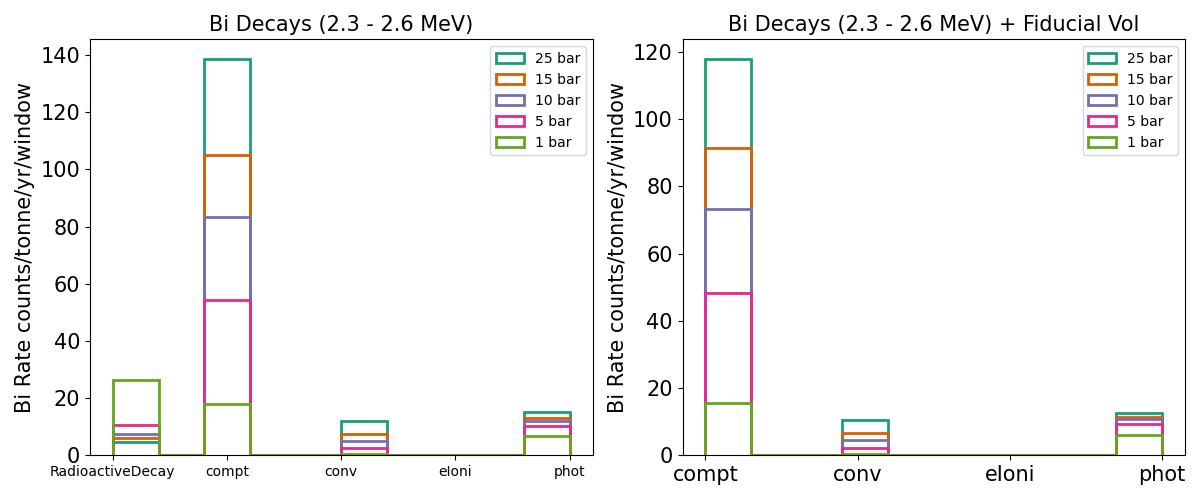

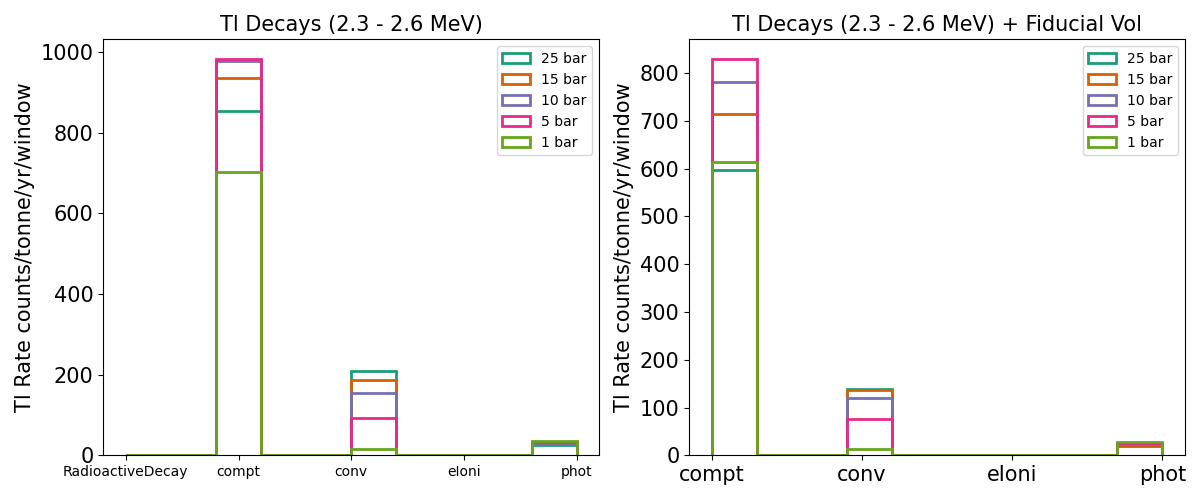

In [92]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)  # row, col,index
plt.hist(sorted(Bi_ion_25bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar.CreatorProc) * sf_Bi_25bar, label = "25 bar");
plt.hist(sorted(Bi_ion_15bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar.CreatorProc) * sf_Bi_15bar, label = "15 bar");
plt.hist(sorted(Bi_ion_10bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar.CreatorProc) * sf_Bi_10bar, label = "10 bar");
plt.hist(sorted(Bi_ion_5bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar.CreatorProc)  * sf_Bi_5bar , label = "5 bar");
plt.hist(sorted(Bi_ion_1bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar.CreatorProc)  * sf_Bi_1bar , label = "1 bar");

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.legend()
plt.tick_params(axis='y', which='both', labelsize=15)
plt.tight_layout()

plt.subplot(1, 2, 2)  # row, col,index
plt.hist(sorted(Bi_ion_25bar[Bi_ion_25bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar[Bi_ion_25bar.contained == True].CreatorProc) * sf_Bi_25bar, label = "25 bar");
plt.hist(sorted(Bi_ion_15bar[Bi_ion_15bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar[Bi_ion_15bar.contained == True].CreatorProc) * sf_Bi_15bar, label = "15 bar");
plt.hist(sorted(Bi_ion_10bar[Bi_ion_10bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar[Bi_ion_10bar.contained == True].CreatorProc) * sf_Bi_10bar, label = "10 bar");
plt.hist(sorted(Bi_ion_5bar[Bi_ion_5bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar[Bi_ion_5bar.contained == True].CreatorProc)  * sf_Bi_5bar,  label = "5 bar");
plt.hist(sorted(Bi_ion_1bar[Bi_ion_1bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar[Bi_ion_1bar.contained == True].CreatorProc)  * sf_Bi_1bar,  label = "1 bar");

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV) + Fiducial Vol", fontsize=15)
plt.legend()
plt.tick_params(axis='both', which='both', labelsize=15)
plt.tight_layout()

plt.savefig(f"plots/Technote/ParentProcessBi.pdf")


plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)  # row, col,index
plt.hist(sorted(Tl_ion_25bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar.CreatorProc) * sf_Tl_25bar, label = "25 bar");
plt.hist(sorted(Tl_ion_15bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_15bar.CreatorProc) * sf_Tl_15bar, label = "15 bar");
plt.hist(sorted(Tl_ion_10bar.CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar.CreatorProc) * sf_Tl_10bar, label = "10 bar");
plt.hist(sorted(Tl_ion_5bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar.CreatorProc)  * sf_Tl_5bar, label = "5 bar");
plt.hist(sorted(Tl_ion_1bar.CreatorProc),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar.CreatorProc)  * sf_Tl_1bar, label = "1 bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.legend()
plt.tick_params(axis='y', which='both', labelsize=15)
plt.tight_layout()

plt.subplot(1, 2, 2)  # row, col,index
plt.hist(sorted(Tl_ion_25bar[Tl_ion_25bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar[Tl_ion_25bar.contained == True].CreatorProc) * sf_Tl_25bar, label = "25 bar");
plt.hist(sorted(Tl_ion_15bar[Tl_ion_15bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_15bar[Tl_ion_15bar.contained == True].CreatorProc) * sf_Tl_15bar, label = "15 bar");
plt.hist(sorted(Tl_ion_10bar[Tl_ion_10bar.contained == True].CreatorProc), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar[Tl_ion_10bar.contained == True].CreatorProc) * sf_Tl_10bar, label = "10 bar");
plt.hist(sorted(Tl_ion_5bar[Tl_ion_5bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar[Tl_ion_5bar.contained == True].CreatorProc)  * sf_Tl_5bar, label = "5 bar");
plt.hist(sorted(Tl_ion_1bar[Tl_ion_1bar.contained == True].CreatorProc),   histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar[Tl_ion_1bar.contained == True].CreatorProc)  * sf_Tl_1bar, label = "1 bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV) + Fiducial Vol", fontsize=15)
plt.legend()
plt.tick_params(axis='both', which='both', labelsize=15)
plt.tight_layout()

plt.savefig(f"plots/Technote/ParentProcessTl.pdf")

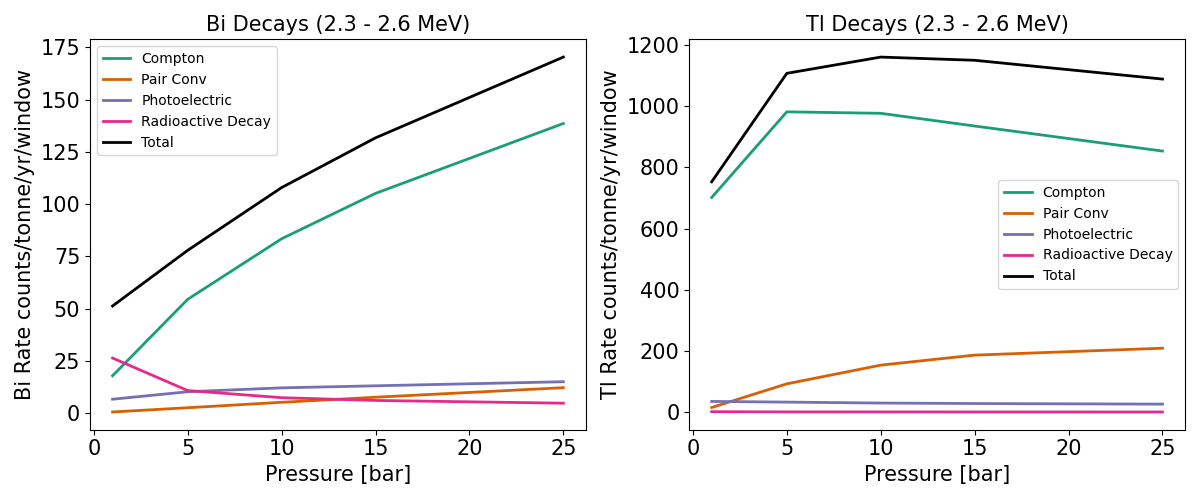

In [93]:
plt.figure(figsize=(12,5))

def GetRProc(df, proc, sf):

    # return len(df[ (df.contained == True) & (df.CreatorProc == proc)]) * sf
    return len(df[ (df.CreatorProc == proc)]) * sf

pressures = [1, 5, 10, 15, 25]
rate_Bi_Comp = np.array([ GetRProc(Bi_ion_1bar, "compt", sf_Bi_1bar), GetRProc(Bi_ion_5bar, "compt", sf_Bi_5bar), GetRProc(Bi_ion_10bar, "compt", sf_Bi_10bar), GetRProc(Bi_ion_15bar, "compt", sf_Bi_15bar), GetRProc(Bi_ion_25bar, "compt", sf_Bi_25bar) ])
rate_Tl_Comp = np.array([ GetRProc(Tl_ion_1bar, "compt", sf_Tl_1bar), GetRProc(Tl_ion_5bar, "compt", sf_Tl_5bar), GetRProc(Tl_ion_10bar, "compt", sf_Tl_10bar), GetRProc(Tl_ion_15bar, "compt", sf_Tl_15bar), GetRProc(Tl_ion_25bar, "compt", sf_Tl_25bar) ])

rate_Bi_Conv = np.array([ GetRProc(Bi_ion_1bar, "conv", sf_Bi_1bar),  GetRProc(Bi_ion_5bar, "conv", sf_Bi_5bar),  GetRProc(Bi_ion_10bar, "conv", sf_Bi_10bar),  GetRProc(Bi_ion_15bar, "conv", sf_Bi_15bar),  GetRProc(Bi_ion_25bar, "conv", sf_Bi_25bar) ])
rate_Tl_Conv = np.array([ GetRProc(Tl_ion_1bar, "conv", sf_Tl_1bar),  GetRProc(Tl_ion_5bar, "conv", sf_Tl_5bar),  GetRProc(Tl_ion_10bar, "conv", sf_Tl_10bar),  GetRProc(Tl_ion_15bar, "conv", sf_Tl_15bar),  GetRProc(Tl_ion_25bar, "conv", sf_Tl_25bar) ])

rate_Bi_Phot = np.array([ GetRProc(Bi_ion_1bar, "phot", sf_Bi_1bar),  GetRProc(Bi_ion_5bar, "phot", sf_Bi_5bar),  GetRProc(Bi_ion_10bar, "phot", sf_Bi_10bar),  GetRProc(Bi_ion_15bar, "phot", sf_Bi_15bar),  GetRProc(Bi_ion_25bar, "phot", sf_Bi_25bar) ])
rate_Tl_Phot = np.array([ GetRProc(Tl_ion_1bar, "phot", sf_Tl_1bar),  GetRProc(Tl_ion_5bar, "phot", sf_Tl_5bar),  GetRProc(Tl_ion_10bar, "phot", sf_Tl_10bar),  GetRProc(Tl_ion_15bar, "phot", sf_Tl_15bar),  GetRProc(Tl_ion_25bar, "phot", sf_Tl_25bar) ])

rate_Bi_Decay = np.array([ GetRProc(Bi_ion_1bar, "RadioactiveDecay", sf_Bi_1bar),  GetRProc(Bi_ion_5bar, "RadioactiveDecay", sf_Bi_5bar),  GetRProc(Bi_ion_10bar, "RadioactiveDecay", sf_Bi_10bar),  GetRProc(Bi_ion_15bar, "RadioactiveDecay", sf_Bi_15bar),  GetRProc(Bi_ion_25bar, "RadioactiveDecay", sf_Bi_25bar) ])
rate_Tl_Decay = np.array([ GetRProc(Tl_ion_1bar, "RadioactiveDecay", sf_Tl_1bar),  GetRProc(Tl_ion_5bar, "RadioactiveDecay", sf_Tl_5bar),  GetRProc(Tl_ion_10bar, "RadioactiveDecay", sf_Tl_10bar),  GetRProc(Tl_ion_15bar, "RadioactiveDecay", sf_Tl_15bar),  GetRProc(Tl_ion_25bar, "RadioactiveDecay", sf_Tl_25bar) ])

plt.subplot(1, 2, 1)  # row, col,index
plt.plot(pressures, rate_Bi_Comp, linewidth=2,  label = "Compton")
plt.plot(pressures, rate_Bi_Conv, linewidth=2,  label = "Pair Conv")
plt.plot(pressures, rate_Bi_Phot, linewidth=2,  label = "Photoelectric")
plt.plot(pressures, rate_Bi_Decay, linewidth=2,  label = "Radioactive Decay")
plt.plot(pressures, rate_Bi_Comp + rate_Bi_Conv + rate_Bi_Phot + rate_Bi_Decay, linewidth=2,  label = "Total", color = "k")

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()

plt.subplot(1, 2, 2)  # row, col,index
plt.plot(pressures, rate_Tl_Comp, linewidth = 2, label = "Compton")
plt.plot(pressures, rate_Tl_Conv, linewidth = 2, label = "Pair Conv")
plt.plot(pressures, rate_Tl_Phot, linewidth = 2, label = "Photoelectric")
plt.plot(pressures, rate_Tl_Decay, linewidth=2,  label = "Radioactive Decay")
plt.plot(pressures, rate_Tl_Comp + rate_Tl_Conv + rate_Tl_Phot + rate_Tl_Decay, linewidth=2,  label = "Total", color = "k")

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.xlabel("Pressure [bar]", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.tight_layout()


plt.savefig(f"plots/Technote/ParentProcessPressure.pdf")

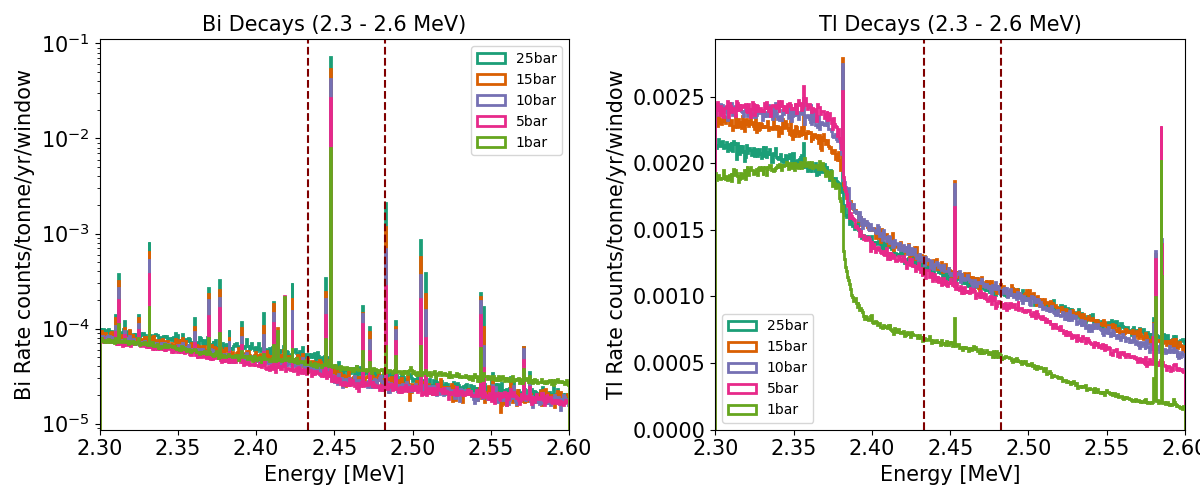

In [116]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)  # row, col,index
plt.hist(Bi_ion_25bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_25bar.energy) * sf_Bi_25bar*6.012e-4, label = "25bar");
plt.hist(Bi_ion_15bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_15bar.energy) * sf_Bi_15bar*6.012e-4, label = "15bar");
plt.hist(Bi_ion_10bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_10bar.energy) * sf_Bi_10bar*6.012e-4, label = "10bar");
plt.hist(Bi_ion_5bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_5bar.energy) * sf_Bi_5bar*6.012e-4, label = "5bar");
plt.hist(Bi_ion_1bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Bi_ion_1bar.energy) * sf_Bi_1bar*6.012e-4, label = "1bar");

plt.ylabel("Bi Rate counts/tonne/yr/window", fontsize=15)
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.semilogy()
plt.tight_layout()

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")
plt.xlim(2.3,2.6)


plt.subplot(1, 2, 2)  # row, col,index
plt.hist(Tl_ion_25bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_25bar.energy) * sf_Tl_25bar*6.012e-4, label = "25bar");
plt.hist(Tl_ion_15bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_15bar.energy) * sf_Tl_15bar*6.012e-4, label = "15bar");
plt.hist(Tl_ion_10bar.energy, bins = np.linspace(2.3,2.6,500), histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_10bar.energy) * sf_Tl_10bar*6.012e-4, label = "10bar");
plt.hist(Tl_ion_5bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_5bar.energy) * sf_Tl_5bar*6.012e-4, label = "5bar");
plt.hist(Tl_ion_1bar.energy, bins = np.linspace(2.3,2.6,500),  histtype="step", linewidth=2, weights = np.ones_like(Tl_ion_1bar.energy) * sf_Tl_1bar*6.012e-4, label = "1bar");

plt.ylabel("Tl Rate counts/tonne/yr/window", fontsize=15)
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.xlabel("Energy [MeV]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
# plt.semilogy()
plt.tight_layout()
plt.xlim(2.3,2.6)

plt.axvline(x = 2.4333804, color = 'Maroon', linestyle="--")
plt.axvline(x = 2.4825396, color = 'Maroon', linestyle="--")

plt.savefig(f"plots/Technote/BiTlEnergySpectrum.pdf")

In [95]:
print("Fraction Uncontained Bi 25 bar:", 100*len(Bi_ion_25bar[Bi_ion_25bar.contained == False])/len(Bi_ion_25bar[Bi_ion_25bar.contained == True]))
print("Fraction Uncontained Bi 15 bar:", 100*len(Bi_ion_15bar[Bi_ion_15bar.contained == False])/len(Bi_ion_15bar[Bi_ion_15bar.contained == True]))
print("Fraction Uncontained Bi 10 bar:", 100*len(Bi_ion_10bar[Bi_ion_10bar.contained == False])/len(Bi_ion_10bar[Bi_ion_10bar.contained == True]))

Fraction Uncontained Bi 25 bar: 20.928489742168008
Fraction Uncontained Bi 15 bar: 20.540081391665186
Fraction Uncontained Bi 10 bar: 21.869723185644027


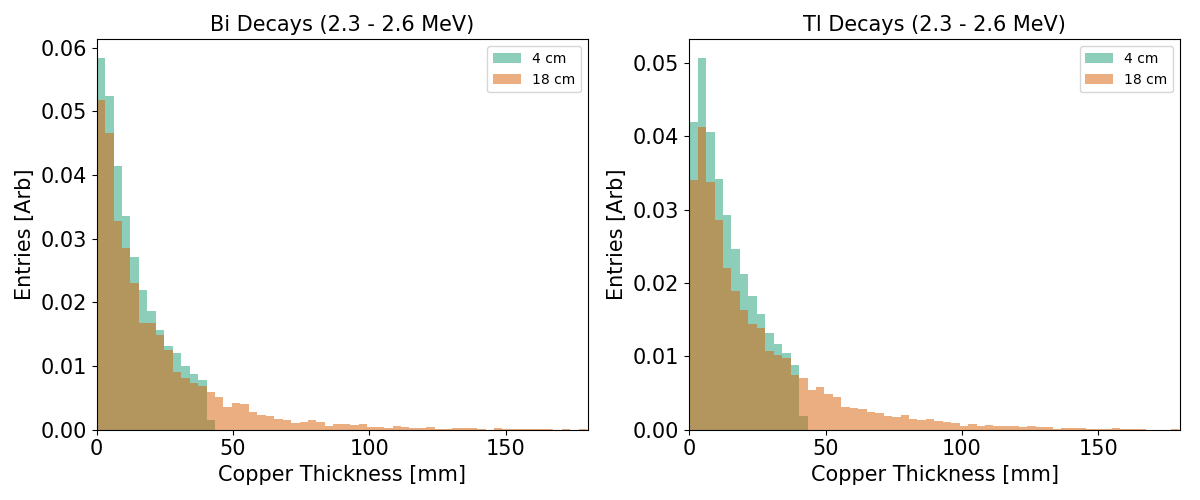

In [115]:
Bi_ion_25bar_4cm = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_4cm_merged.h5", "MC/E")
Bi_ion_25bar_18cm = pd.read_hdf("../data/GammaTables/GammaTable_Bi_ion_25bar_18cm_merged.h5", "MC/E")
Tl_ion_25bar_4cm = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_4cm_merged.h5", "MC/E")
Tl_ion_25bar_18cm = pd.read_hdf("../data/GammaTables/GammaTable_Tl_ion_25bar_18cm_merged.h5", "MC/E")


Bi_ion_25bar_4cm = Bi_ion_25bar_4cm[ (Bi_ion_25bar_4cm.initial_z >-800)  & (Bi_ion_25bar_4cm.initial_z < 800)]
Bi_ion_25bar_18cm = Bi_ion_25bar_18cm[ (Bi_ion_25bar_18cm.initial_z >-800)  & (Bi_ion_25bar_18cm.initial_z < 800)]
Bi_ion_25bar_4cm["R"] = np.sqrt(Bi_ion_25bar_4cm.initial_x**2 + Bi_ion_25bar_4cm.initial_y**2)
Bi_ion_25bar_18cm["R"] = np.sqrt(Bi_ion_25bar_18cm.initial_x**2 + Bi_ion_25bar_18cm.initial_y**2)

Tl_ion_25bar_4cm       = Tl_ion_25bar_4cm[ (Tl_ion_25bar_4cm.initial_z >-800)  & (Tl_ion_25bar_4cm.initial_z < 800)]
Tl_ion_25bar_18cm      = Tl_ion_25bar_18cm[ (Tl_ion_25bar_18cm.initial_z >-800)  & (Tl_ion_25bar_18cm.initial_z < 800)]
Tl_ion_25bar_4cm["R"]  = np.sqrt(Tl_ion_25bar_4cm.initial_x**2 + Tl_ion_25bar_4cm.initial_y**2)
Tl_ion_25bar_18cm["R"] = np.sqrt(Tl_ion_25bar_18cm.initial_x**2 + Tl_ion_25bar_18cm.initial_y**2)



plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)  # row, col,index
plt.hist(Bi_ion_25bar_4cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "4 cm", linewidth=2);
plt.hist(Bi_ion_25bar_18cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "18 cm", linewidth=2);
plt.xlim(0,180)
plt.xlabel("Copper Thickness [mm]", fontsize=15)
plt.ylabel("Entries [Arb]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("Bi Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.tight_layout()


plt.subplot(1, 2, 2)  # row, col,index
plt.hist(Tl_ion_25bar_4cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "4 cm", linewidth=2);
plt.hist(Tl_ion_25bar_18cm.R-1056, bins = np.arange(0, 180, 3.1), alpha=0.5, density=True, label = "18 cm", linewidth=2);
plt.xlim(0,180)
plt.xlabel("Copper Thickness [mm]", fontsize=15)
plt.ylabel("Entries [Arb]", fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=15)
plt.legend()
plt.title("Tl Decays (2.3 - 2.6 MeV)", fontsize=15)
plt.tight_layout()

plt.savefig(f"plots/Technote/CuDepth.pdf")